## 連続型確率分布

### 6.6 正規分布(ガウス分布)

> ガウスは、天文学の観測データの分析を行う中で測定誤差がある基本的な法則に従うことを仮定して、誤差理論を確率した。 \
> これを「ガウスの誤差関数」と言い、今日正規分布と言われているものの原型である。

- 最も代表的な連続型確率分布
- 自然界や人間社会の多くの現象に当てはまる(生物測定の分野に多かったりする)
- 統計学の理論上も応用上も非常に重要

#### 【正規分布$\ N(\mu, \sigma ^2)\ $】
- 確率密度関数
$$ f(x) = \frac{1}{\sqrt{2\pi} \sigma}exp\{-\frac{(x-\mu)^2}{2\sigma ^2}\}, \ \ \ -\infty <x<\infty$$
- 期待値 $E(X) = \mu$
- 分散 $V(X) = \sigma$
- 平均、分散の値を使って、$f(x)$を「平均$\mu$、分散$\sigma ^2$の正規分布」といい、$N(\mu, \sigma ^2)$で表す。
- Xが$N(\mu, \sigma ^2)$に従う時、その線形変換$Y=aX+b$は$N(a\mu +b, a^2 \sigma ^2)$に従う(証明略)。
- Xが$N(\mu, \sigma ^2)$に従う時、その線形変換$Z=(X-\mu)/\sigma$は$N(0,1)$に従う。これを**標準正規分布**(standard normal distribution)という。
---

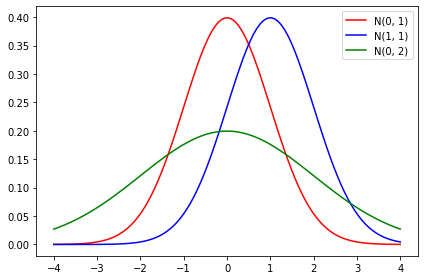

In [5]:
# 確率分布関数を実装してみる
import numpy as np
import matplotlib.pyplot as plt

def norm(x, m=0, s=1):
    y = np.exp(-(x-m)**2/(2*s**2))/(np.sqrt(2*np.pi)*s)
    return y

x = np.linspace(-4, 4, 100)
n_std = norm(x)
n_1_1 = norm(x, 1, 1)
n_0_2 = norm(x, 0, 2)

fig, ax = plt.subplots()
ax.plot(x, n_std, color="red", label="N(0, 1)")
ax.plot(x, n_1_1, color="blue", label="N(1, 1)")
ax.plot(x, n_0_2, color="green", label="N(0, 2)")
ax.legend(loc=0)
plt.tight_layout()
plt.show()

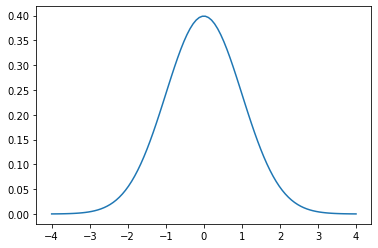

In [7]:
# 確率分布関数を実装しない
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = np.linspace(-4, 4, num=100)
y = stats.norm.pdf(x=x, loc=0, scale=1)

plt.plot(x, y)

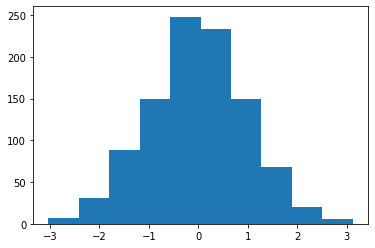

In [9]:
# 正規分布に従う乱数を生成
import numpy as np
import matplotlib.pyplot as plt

r = np.random.normal(loc=0, scale=1, size=1000) # 標準正規分布の場合はnp.random.randn(size)でも可
plt.hist(r)
plt.show()

---
#### 【3シグマ範囲】
標準正規分布の累積分布関数
$$\Phi (z) = \int_{-\infty}^{z} \frac{1}{\sqrt{2\pi}} exp(-\frac{x^2}{2})dx$$
の数値表(標準正規分布表)は検定等でよく使用される。(巻末の付表1を参照)

$$
    P(-1\leq Z\leq 1) = \Phi(1) - \Phi(-1) = 0.6827 \\
    P(-2\leq Z\leq 2) = \Phi(2) - \Phi(-2) = 0.9545 \\
    P(-3\leq Z\leq 3) = \Phi(3) - \Phi(-3) = 0.9973 \\
$$

$-3\leq Z\leq 3$は、もとのXでいえば$\mu -3\sigma \leq X \leq \mu +3\sigma$ に相当する。 \
上の計算から、この範囲は事実上全てを占めている。「事実上の全て」の意味で、区間$[\mu -3\sigma, \mu +3\sigma]$を、**3シグマ範囲**という。

【中心極限定理】 \
正規分布はランダムな事象の**試行回数を多くしたとき**の和や平均としても生じる。(一様乱数の和など) \
これを中心極限定理という。この内容は次のように説明できる。 
> 同一の確率分布$f(x)$を持つn個の独立な確率変数の和$\ X_1+X_2+X_3+\cdots +X_n\ $は、もとの$f(x)$が何であろうと、 \
> ある緩い仮定を満たせば、nが大きい時にはほぼ正規分布に従っていると仮定して良い。 \

###### 「ある緩い仮定」については難しそうなので触れません。。誰か調べて教えて。。。

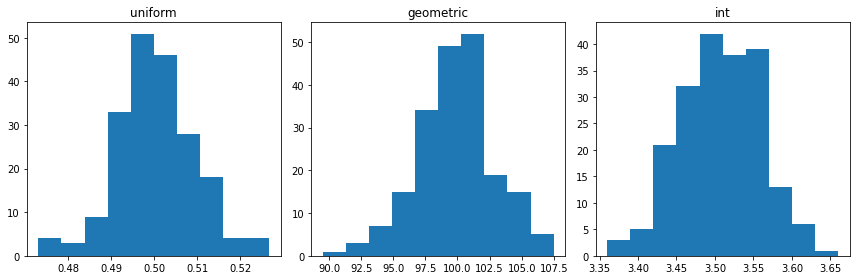

In [45]:
# 中心極限定理を試してみる
import random
import numpy as np
import matplotlib.pyplot as plt

def get_sums(dist, n=1000, size=200):
    sums = []
    for i in range(size):
        if dist=="uniform":
            rands = np.random.rand(n)
        elif dist=="geom":
            rands = np.random.geometric(0.01, n)
        else:
            rands = np.random.randint(1, 7, n)
        sums.append(np.sum(rands)/n)
    return sums

sums_uniform = get_sums("uniform") # 一様乱数
sums_geom = get_sums("geom") # 幾何分布
sums_int = get_sums("int") # サイコロの目の和

fig = plt.figure(figsize=(12, 4))
ax1=fig.add_subplot(1, 3, 1)
ax2=fig.add_subplot(1, 3, 2)
ax3=fig.add_subplot(1, 3, 3)
ax1.set_title("uniform")
ax1.hist(sums_uniform)
ax2.set_title("geometric")
ax2.hist(sums_geom)
ax3.set_title("int")
ax3.hist(sums_int)
plt.tight_layout()
plt.show()

---

【平均と分散の導出】 \
モーメント母関数を使用して証明する。 \
正規分布のモーメント母関数は
$$
\begin{eqnarray}
    m_X (t) &=& E(e^{tX}) \\
    &=& \int_{-\infty}^{\infty} e^{tx} f(x) dx \\
    &=& \int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi} \sigma} exp[-\frac{(x-\mu)^2}{2\sigma ^2} + tx] dx \\
    &=& \int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi} \sigma} exp[-\frac{1}{2\sigma ^2}(x^2-2\mu x+\mu ^2 - 2\sigma ^2 tx)] dx \\
    &=& \int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi} \sigma} exp[-\frac{1}{2\sigma ^2}((x-(\mu +\sigma ^2t))^2 + 2\mu \sigma ^2t+\sigma ^4t^2)] dx \\
    &=& \int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi} \sigma} exp[-\frac{(x-(\mu + \sigma ^2t))^2}{2\sigma ^2} + \mu t + \frac{\sigma ^2t^2}{2}] dx \\
    &=& e^{\mu t+\frac{\sigma ^2t^2}{2}} \int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi} \sigma} exp[-\frac{(x-(\mu + \sigma ^2t))^2}{2\sigma ^2}] dx \\
    &=& e^{\mu t+\frac{\sigma ^2t^2}{2}}
\end{eqnarray}
$$

なので、

$$
\begin{eqnarray}
    E(X) &=& m_X'(0) \\
    &=& \left.(\mu + \sigma ^2t) e^{\mu t+\frac{\sigma ^2t^2}{2}} \right|_{t=0} \\
    &=& \mu \\
\end{eqnarray}
$$

$$  
\begin{eqnarray}
    V(X) &=& E(X^2) - \{ E(X) \}^2 \\
    &=& m_X''(0) - \{ m_X'(0)\}^2 \\
    &=& \left. \left\{ (\mu + \sigma ^2t)' e^{\mu t+\frac{\sigma ^2t^2}{2}} + (\mu + \sigma ^2t)^2 e^{\mu t+\frac{\sigma ^2t^2}{2}} \right\} \right|_{t=0} - \mu ^2\\
    &=& \sigma ^2 + \mu ^2 - \mu ^2 \\
    &=& \sigma ^2
\end{eqnarray}
$$

---

### 6.7 指数分布

#### 【指数分布$\ Ex(\lambda)\ $】
- 確率密度関数 $\ \ \  f(x) = \lambda e^{-\lambda x}\ \ \ \ (x \geq 0),\ \ \ \ 0\ (x<0)$
- 累積分布関数 $\ \ \  F(x) = P(X\leq x)=1-e^{-\lambda x}\ \ \ \ (x \geq 0),\ \ \ \ 0\ (x<0)$
- 期待値 $E(X) = 1/\lambda$
- 分散 $V(X) = 1/\lambda ^2\ \ \ $ ($\ E(X) = D(X)\ $)

#### 【幾何分布との比較】
離散型確率分布で登場した幾何分布$\ f(x)=pq^{x-1}\ \ (q=1-p)\ $において、$\ q=e^{-\lambda}\ $とおくと$\ f(x)=(pe^{\lambda})e^{-\lambda x}\ $となり、指数分布の形になる。 \
よって、指数分布は幾何分布と同様に**待ち時間分布**の性質を持つ。 \
 \
確率変数Xが指数分布に従うならば、累積分布関数の式を逆にして$$\ \ \  P(X > x)=e^{-\lambda x}\ \ \ \ (x \geq 0),\ \ \ \ 1\ (x<0)$$であるから、
$x\geq 0\ $の部分では$$log\ P(X > x)=-\lambda x\ $$となり、縦軸を対数尺にした片対数グラフにおいて$\ P(X > x)\ $は直線になる。 \
 \
さらに、N回の測定でxより大きい測定値がN(x)回あったとすると$\ P(X>x)\approx N(x)/N\ $なので、$a=log\ N$とおくと \
$$
    log\ N(x)=a-\lambda x
$$
となる。図6.11は航空事故の間隔日数に対して$N(x)$をプロットしたものであり、この式に合致していることが分かる。

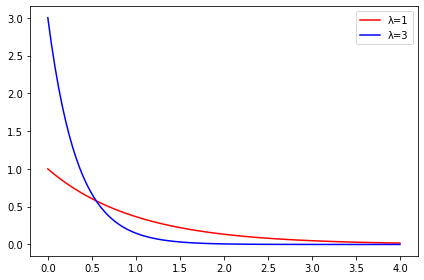

In [46]:
# 確率分布関数を実装してみる
import numpy as np
import matplotlib.pyplot as plt

def exp_dist(x, l=1):
    y = l * np.exp(-l*x)
    return y

x = np.linspace(0, 4, 100)
e1 = exp_dist(x)
e3 = exp_dist(x, 3)

fig, ax = plt.subplots()
ax.plot(x, e1, color="red", label="λ=1")
ax.plot(x, e3, color="blue", label="λ=3")
ax.legend(loc=0)
plt.tight_layout()
plt.show()

# 実装しない場合はscipy.stats.exponを使う

---
【平均と分散の導出】
$$
\begin{eqnarray}
    E(X) &=& \int_{0}^{\infty} x\lambda e^{-\lambda x} \\
    &=& \lambda \int_{0}^{\infty} x(-\frac{1}{\lambda}e^{-\lambda x})'dx \\
    &=& \lambda \left(\left[ x(-\frac{1}{\lambda}e^{-\lambda x})\right]_{0}^{\infty} - \int_{0}^{\infty}(-\frac{1}{\lambda}e^{-\lambda x})dx \right) \\
    &=& \lambda(0-\left[\frac{1}{\lambda ^2}e^{-\lambda x}\right]_{0}^{\infty}) \\
    &=& \frac{1}{\lambda} \\
    E(X^2) &=& \int_{0}^{\infty} x^2 \lambda e^{-\lambda x} \\
    &=& \lambda \int_{0}^{\infty} x^2 (-\frac{1}{\lambda}e^{-\lambda x})'dx \\
    &=& \lambda \left\{\left[ x^2 (-\frac{1}{\lambda}e^{-\lambda x})\right]_{0}^{\infty} - \int_{0}^{\infty}(-2x\frac{1}{\lambda}e^{-\lambda x})dx\right\} \\
    &=& \lambda \left\{0+\int_{0}^{\infty}(2x\frac{1}{\lambda}e^{-\lambda x})dx\right\} \\
    &=& \lambda \left(\frac{2}{\lambda ^2}\int_{0}^{\infty}x\lambda e^{-\lambda x}dx\right) \\
    &=& \frac{2}{\lambda ^2} \\
    V(X) &=& E(X^2) - \{ E(X) \}^2 = \frac{1}{\lambda ^2}
\end{eqnarray}
$$

---

### 6.8 ガンマ分布
ガンマ分布は、指数分布を一般化したもの。

#### 【ガンマ分布$\ Ga(\alpha, \lambda)\ $の性質】
- 確率密度関数 $$f(x) = \frac{\lambda ^\alpha}{\Gamma (\alpha )} x^{\alpha -1} e^{-\lambda x}\ \ \ \ (x \geq 0),\ \ \ \ 0\ (x<0)$$
- 期待値 $E(X) = \alpha/\lambda$
- 分散 $V(X) = \alpha/\lambda ^2$
- $\alpha = 1$の時、指数分布となる ($\ Ga(1, \lambda) = Ex(\lambda)\ $)
- $\alpha = k/2, \lambda = 2\ $の時、自由度kの$\chi ^2$(カイ二乗)分布になる ($\ Ga(k/2, 2) = \chi ^2(k)\ $)
- 確率変数$\ X_1, X_2, X_3, \cdots ,X_{\alpha}\ $が独立で指数分布$Ex(\lambda)$に従うなら、$\ X_1+ X_2+ X_3+ \cdots +X_{\alpha}\ $は、ガンマ分布$\ Ga(\alpha, \lambda)\ $に従う

ガンマ分布は複雑な形をしているので式を記憶する必要はないが、上記のように統計学のいろいろなところに顔を出す、極めて重要な分布である。 \
現実には体重の分布や、「エイズの潜伏期間」の分布がガンマ分布に従うという報告がある。 \
また、ベイズ統計学においても有用性が高い。

#### 【ガンマ関数 $\ \Gamma (\alpha)\ $】
ガンマ関数はガンマ分布の正規化定数であり、以下の式で表される。
$$\Gamma (\alpha) = \int_{0}^{\infty} x^{\alpha -1} e^{-x}dx$$
これは階乗の式$n!$を実数全体に拡張したものである(実数$\alpha$に対して$\Gamma (\alpha + 1)=\alpha !$)。 \
$\ \Gamma (1/2) = \sqrt{\pi}\$となる。

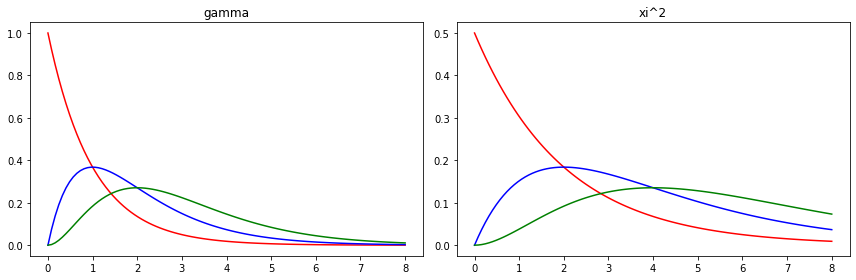

In [54]:
# 確率分布関数を実装してみる
import numpy as np
import matplotlib.pyplot as plt

def gamma_dist(x, a=1, l=1):
    g = 1
    for i in range(1, a):
        g*=i
    y = (l**a / g) * x**(a-1) * (np.e ** (-l*x))
    return y

x = np.linspace(0, 8, 100)
g1 = gamma_dist(x)
g2 = gamma_dist(x, 2)
g3 = gamma_dist(x, 3)

# カイ二乗
x1 = gamma_dist(x, 1, 0.5)
x2 = gamma_dist(x, 2, 0.5)
x3 = gamma_dist(x, 3, 0.5)

fig = plt.figure(figsize=(12, 4))
ax1=fig.add_subplot(1, 2, 1)
ax2=fig.add_subplot(1, 2, 2)
ax1.set_title("gamma")
ax1.plot(x, g1, color="red", label="α=1")
ax1.plot(x, g2, color="blue", label="α=2")
ax1.plot(x, g3, color="green", label="α=3")
ax2.set_title("xi^2")
ax2.plot(x, x1, color="red", label="自由度: 2")
ax2.plot(x, x2, color="blue", label="自由度: 4")
ax2.plot(x, x3, color="green", label="自由度: 6")
plt.tight_layout()
plt.show()

# 実装しない場合はscipy.stats.gammaを使う

---
【0以上の整数に対して階乗の値と一致することの証明】 \
あまり大事なところではないので方針だけ。 \
$\Gamma (1)=1\ $は簡単に計算できる。 また、部分積分を使えば$\ \Gamma (n) = (n-1)\Gamma (n-1)\ $が分かるので、この2式を組み合わせれば \
$\Gamma (n+1) = n!\Gamma(1) = n!\ $となる。

---

### 6.9 ベータ分布と一様分布

#### 【ベータ分布$\ Be(\alpha, \beta)$】
- 確率分布関数$\ \ f(x)=x^{\alpha -1}(1-x)^{\beta -1}\ /\ B(\alpha, \beta)\ \ \ (0<x<1,\ \alpha >0,\ \beta >0),\ \ 0\ $(それ以外)
- 期待値$\ E(X) = \alpha \ /\ (\alpha + \beta) $
- 分散$\ V(X) = \alpha \beta \ /\ (\alpha + \beta)^2 (\alpha + \beta + 1) $

現実でのベータ分布の現象例は少ないが、ベイズ統計学では大きい役割を持つ。 \
ベータ分布は$\alpha, \beta$の値により様々な形をとる(図6.13)。 \
また、$\alpha = \beta = 1\ $の時は一様分布$\ f(x)\equiv 1\ $となる。

#### 【ベータ関数$\ B(\alpha, \beta)$】
ベータ関数はベータ分布の正規化定数であり、以下の式で表される。
$$B(\alpha, \beta) = \int^1_0 x^{\alpha -1}(1-x)^{\beta -1}dx,\ \ \ \alpha >0,\ \ \ \beta>0$$
ベータ関数とガンマ関数は以下の関係がある。
$$B(\alpha, \beta) = \Gamma (\alpha)\Gamma (\beta)\ /\ \Gamma (\alpha + \beta)$$

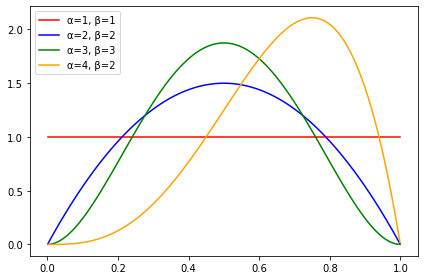

In [70]:
# 確率分布関数を実装してみる
import numpy as np
import matplotlib.pyplot as plt
from math import gamma as ga

def beta_dist(x, a=1, b=1):
    y = x**(a-1) * (1-x)**(b-1) / (ga(a)*ga(b)/ga(a+b))
    return y

x = np.linspace(0.001, 0.999, 100)
b11 = beta_dist(x)
b22 = beta_dist(x, 2, 2)
b33 = beta_dist(x, 3, 3)
b42 = beta_dist(x, 4, 2)

fig, ax = plt.subplots()
ax.plot(x, b11, color="red", label="α=1, β=1")
ax.plot(x, b22, color="blue", label="α=2, β=2")
ax.plot(x, b33, color="green", label="α=3, β=3")
ax.plot(x, b42, color="orange", label="α=4, β=2")
ax.legend(loc=0)
plt.tight_layout()
plt.show()

# 実装しない場合はscipy.stats.betaを使う

---
### 6.10 コーシー分布

#### 【コーシー分布】
- 確率密度関数 $\ f(x) = \alpha \  /\ \pi \{\alpha ^2+(x-\lambda)^2\}\ \ \ (\alpha >0)$

一見正規分布に似ている(図6.14)が、性質は全く違う。最大の特徴は期待値も分散もモーメント母関数も存在しないことである。

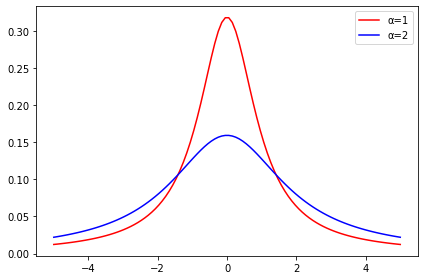

In [60]:
# 確率分布関数を実装してみる
import numpy as np
import matplotlib.pyplot as plt

def cauchy_dist(x, a=1, l=0):
    y = a/(np.pi * (a**2 + (x-l)**2))
    return y

x = np.linspace(-5, 5, 100)
c1 = cauchy_dist(x)
c2 = cauchy_dist(x, a=2)

fig, ax = plt.subplots()
ax.plot(x, c1, color="red", label="α=1")
ax.plot(x, c2, color="blue", label="α=2")
ax.legend(loc=0)
plt.tight_layout()
plt.show()

# 実装しない場合はscipy.stats.cauchyを使う

---

### 6.11 対数正規分布

#### 【対数正規分布】
ランダムに世帯を選びその年間所得$X$を調べた場合、$log\ X$を考えるのが自然である。 \
$log\ X$が正規分布に従うとき、もとの$X$は対数正規分布に従うという。 \
(導出は5.5節を参照)

- 確率密度関数 $$f(x) = \frac{1}{\sqrt{2\pi}\sigma x}exp\{ \frac{-(log\ x - \mu)^2}{2 \sigma ^2}\} \ \ (x>0), \ \ \ 0\ (x \leq 0)$$
- 期待値 $\ E(X) = exp(\mu + \sigma ^2/2)$
- 分散 $\ V(X) = exp(2\mu +2\sigma ^2) - exp(2\mu + \sigma ^2)\ $

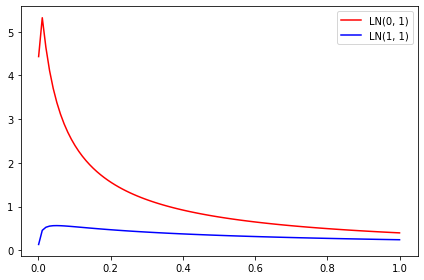

In [66]:
# 確率分布関数を実装してみる
import numpy as np
import matplotlib.pyplot as plt

def lognorm(x, m=0, s=1):
    y = np.exp(-(np.log10(x)-m)**2/(2*s**2))/(np.sqrt(2*np.pi)*s*x)
    return y

x = np.linspace(0.001, 1, 100)
ln_std = lognorm(x)
ln_1_1 = lognorm(x, 1, 1)

fig, ax = plt.subplots()
ax.plot(x, ln_std, color="red", label="LN(0, 1)")
ax.plot(x, ln_1_1, color="blue", label="LN(1, 1)")
ax.legend(loc=0)
plt.tight_layout()
plt.show()

---
### 6.12 パレート分布

#### 【パレート分布】
対数正規分布が全集団の所得分布であるのに対して、高額所得者の所得分布はパレート分布によく当てはまる。 \
パレート分布はある定数$x_0$以上で存在する。

- 確率密度関数 $\ f(x) = (a/x_0)(x_0/x)^{a+1}\ \ \ (x\geq x_0), \ \ 0\ (x<x_0)$
- 期待値 $\ E(X)=\frac{ax_0}{a-1} \ \ (a>1)$
- 分散 $\ V(X)=\frac{ax_0 ^2}{a-2} - (\frac{ax_0}{a-1})^2 \ \ (a>2)$

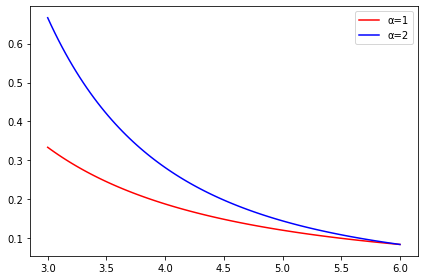

In [68]:
# 確率分布関数を実装してみる
import numpy as np
import matplotlib.pyplot as plt

def pareto(x, x0=3, a=1):
    y = (a/x0)*(x0/x)**(a+1)
    return y

x = np.linspace(3, 6, 100)
p1 = pareto(x)
p2 = pareto(x, 3, 2)

fig, ax = plt.subplots()
ax.plot(x, p1, color="red", label="α=1")
ax.plot(x, p2, color="blue", label="α=2")
ax.legend(loc=0)
plt.tight_layout()
plt.show()

---
### 6.13 ワイブル分布

偶発故障の瞬間故障率は一定であり、耐用年数などの確率変数は指数分布に従うことが証明できる。 \
しかし、劣化による故障率の増加(IFR, Increasing Failure Rate)や「初期故障」の時期の故障率の減少(DFR, Decreasing ~)がある時は、 \
指数分布は当てはまらず、ワイブル分布の方がよく当てはまる。

- 確率密度関数 $\ f(x) = (bx^{b-1}/a^b)\ exp(-(x/a)^b)\ \ \ (x\geq 0), \ \ 0\ (x<0, a,b>0)$
- 期待値 $\ E(X) = a\Gamma (1+(1/b))$
- 分散 $\ V(X) = a^2\{ \Gamma (1+2/b) - \Gamma (1+1/b)^2\}$

母数a, bはそれぞれ尺度母数、形状母数と呼ばれ、bの値をかえると分布の形が変化する。 \
bが大きい時、ワイブル分布は正規分布に近づく。 \
正規分布っぽいが厳密には正規分布でない場合の、精密な当てはめにも用いられる。

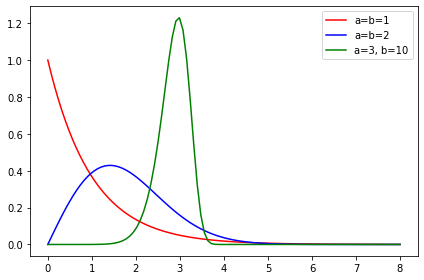

In [81]:
# 確率分布関数を実装してみる
import numpy as np
import matplotlib.pyplot as plt

def weibul(x, a=1, b=1):
    y = (b*x**(b-1)/(a**b))*np.exp(-(x/a)**b)
    return y

x = np.linspace(0, 8, 100)
w1 = weibul(x)
w2 = weibul(x, 2, 2)
w310 = weibul(x, 3, 10)

fig, ax = plt.subplots()
ax.plot(x, w1, color="red", label="a=b=1")
ax.plot(x, w2, color="blue", label="a=b=2")
ax.plot(x, w310, color="green", label="a=3, b=10")
ax.legend(loc=0)
plt.tight_layout()
plt.show()